### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Cars_Assignment.csv
carprice = pd.read_csv('CarPrice_Assignment.csv')
carprice.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
carprice.shape

(205, 26)

In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### We see that none of the columns have null values.

## Data Preparation and Visualizing Data
### There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.

#### Lets retrieve only the first part which is the company name. 

In [6]:
carprice['CarName'] = carprice['CarName'].apply(lambda x: str(x).split(' ')[0].lower())
carprice['CarName'].head(5)

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

#### Lets drop column car_id as we are not analyzing for each different cars

In [7]:
carprice.drop(['car_ID'],inplace=True,axis=1)
carprice.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### There are several categorical variables. Lets plot them to see which can be created as dummy and which can mapped with 1's and 0's

C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


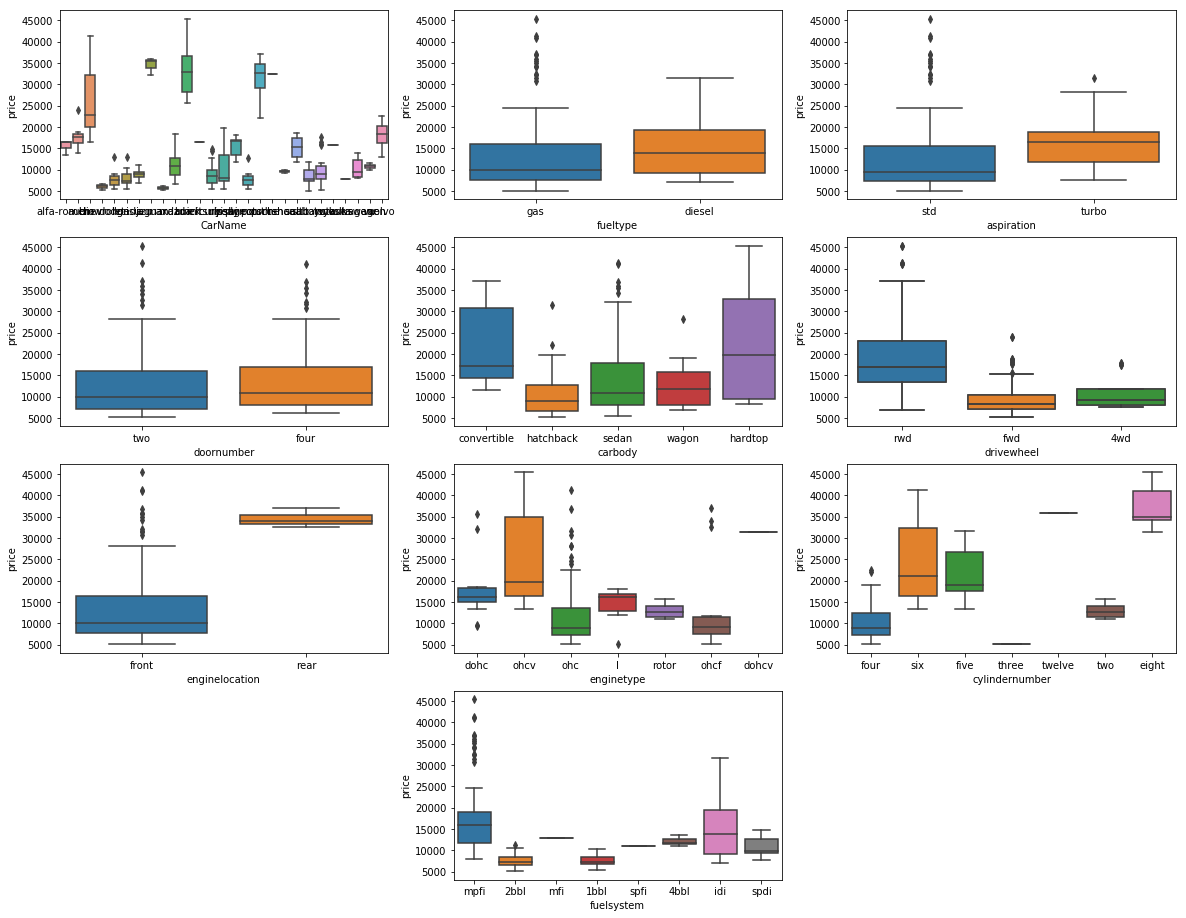

In [8]:
plt.figure(figsize=(20, 16))
plt.subplot(4,3,1)
sns.boxplot(x = 'CarName', y = 'price', data = carprice)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(4,3,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)

plt.show()


### Lets create a dummy variables for all of these categories. Before that lets add column name to its values so that we know which columns we are evaluating.

In [9]:
#carprice['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'].astype(str).apply(lambda x : x.name+'_'+x)
carprice['fueltype'] = str(carprice['fueltype'].name)+"_"+carprice['fueltype'].apply(lambda x:x)
carprice['CarName'] = str(carprice['CarName'].name)+"_"+carprice['CarName'].apply(lambda x:x)
carprice['aspiration'] = str(carprice['aspiration'].name)+"_"+carprice['aspiration'].apply(lambda x:x)
carprice['doornumber'] = str(carprice['doornumber'].name)+"_"+carprice['doornumber'].apply(lambda x:x)
carprice['carbody'] = str(carprice['carbody'].name)+"_"+carprice['carbody'].apply(lambda x:x)
carprice['drivewheel'] = str(carprice['drivewheel'].name)+"_"+carprice['drivewheel'].apply(lambda x:x)
carprice['enginelocation'] = str(carprice['enginelocation'].name)+"_"+carprice['enginelocation'].apply(lambda x:x)
carprice['enginetype'] = str(carprice['enginetype'].name)+"_"+carprice['enginetype'].apply(lambda x:x)
carprice['cylindernumber'] = str(carprice['cylindernumber'].name)+"_"+carprice['cylindernumber'].apply(lambda x:x)
carprice['fuelsystem'] = str(carprice['fuelsystem'].name)+"_"+carprice['fuelsystem'].apply(lambda x:x)

In [10]:
# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['CarName'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['fueltype'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['aspiration'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['doornumber'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['carbody'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['drivewheel'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['enginelocation'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['enginetype'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['cylindernumber'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

# Let's drop the first column using 'drop_first = True'
dummies = pd.get_dummies(carprice['fuelsystem'], drop_first = True)

# Add the results to the original housing dataframe
carprice = pd.concat([carprice, dummies], axis = 1)

In [11]:
carprice.shape

(205, 80)

In [12]:
carprice.drop(['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],inplace=True,axis=1)
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
symboling                205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8
CarName_chevrolet        205 non-null uint8
CarName_dodge            205 non-null uint8

#### Now that we have converted all the categorical variables as numerical. Lets start bulding the model. 

## Splitting the Data into Training and Testing Sets

In [13]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0


### Dividing into X and Y sets for the model building

In [16]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [17]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [18]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [19]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))[0:20]

[('symboling', False, 34),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 29),
 ('highwaympg', False, 16),
 ('CarName_audi', False, 27),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 28),
 ('CarName_chevrolet', False, 13),
 ('CarName_dodge', False, 10),
 ('CarName_honda', False, 12)]

In [20]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_peugeot', 'CarName_porsche', 'CarName_saab',
       'CarName_subaru', 'CarName_volvo', 'enginelocation_rear',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [21]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [22]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [23]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [24]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.19e-71
Time:                        00:47:00   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

#### From above we know that `CarName_Subaro` is insignificant becuase of having p-value of 0.065 which is > 0.05

In [25]:
X_train_new = X_train_rfe.drop(["CarName_subaru"], axis = 1)

In [26]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [27]:
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [28]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.19e-71
Time:                        00:47:03   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

#### We see that the statistics has not changed much but one of the catergories enginetype_ohcf has become insignificant. Lets remove this

In [29]:
X_train_new1 = X_train_new.drop(["enginetype_ohcf"], axis = 1)

In [30]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [31]:
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [32]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.89e-71
Time:                        00:47:06   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

## Now lets check VIF to asses multicollinearity

In [33]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,cylindernumber_two,inf
15,cylindernumber_three,inf
12,enginetype_rotor,inf
11,enginetype_l,inf
6,CarName_peugeot,inf
2,enginesize,97.010000
1,curbweight,59.180000
0,carwidth,43.710000
3,boreratio,37.470000
4,stroke,31.180000


### Lets remove cylindernumber_two as the VIF is infinity for this. Which would mean that we are overfitting the model

In [34]:
X_train_new2 = X_train_new1.drop(["cylindernumber_two"], axis = 1)

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

In [36]:
lm3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [37]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.89e-71
Time:                        00:47:09   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [38]:
# Calculating VIF again

vif = pd.DataFrame()
X = X_train_new2
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,enginetype_l,inf
15,cylindernumber_three,inf
6,CarName_peugeot,inf
2,enginesize,97.010000
1,curbweight,59.180000
0,carwidth,43.710000
3,boreratio,37.470000
4,stroke,31.180000
14,cylindernumber_four,26.440000
12,enginetype_rotor,4.550000


#### Removing "enginetype_l" because multicollinearity still exists

In [39]:
X_train_new3 = X_train_new2.drop(["enginetype_l"], axis = 1)

In [40]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new3)

In [41]:
lm4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [42]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.89e-71
Time:                        00:47:13   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [43]:
# Calculating VIF again

vif = pd.DataFrame()
X = X_train_new3
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,97.01
1,curbweight,59.18
0,carwidth,43.71
3,boreratio,37.47
4,stroke,31.18
13,cylindernumber_four,26.44
11,enginetype_rotor,4.55
12,cylindernumber_five,3.14
15,cylindernumber_twelve,2.95
7,CarName_porsche,2.03


### Lets remove `enginesize` as it can be explained by other factors

In [44]:
X_train_new4 = X_train_new3.drop(["enginesize"], axis = 1)

In [45]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new4)

In [46]:
lm5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [47]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     86.57
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.59e-59
Time:                        00:47:16   Log-Likelihood:                 189.84
No. Observations:                 143   AIC:                            -347.7
Df Residuals:                     127   BIC:                            -300.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

### We see that `CarName_volvo` has become insignificant. Lets remove that

In [48]:
X_train_new5 = X_train_new4.drop(["CarName_volvo"], axis = 1)

In [49]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new5)

In [50]:
lm6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [51]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.47
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.68e-60
Time:                        00:47:19   Log-Likelihood:                 189.84
No. Observations:                 143   AIC:                            -349.7
Df Residuals:                     128   BIC:                            -305.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

#### Lets remove `cylindernumber_four`

In [52]:
X_train_new6 = X_train_new5.drop(["cylindernumber_four"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new6)

lm7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.69e-61
Time:                        00:47:20   Log-Likelihood:                 189.80
No. Observations:                 143   AIC:                            -351.6
Df Residuals:                     129   BIC:                            -310.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

#### Lets remove `cylindernumber_five`

In [53]:
X_train_new7 = X_train_new6.drop(["cylindernumber_five"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new7)

lm8 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.52e-62
Time:                        00:47:21   Log-Likelihood:                 189.76
No. Observations:                 143   AIC:                            -353.5
Df Residuals:                     130   BIC:                            -315.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

#### Lets remove `CarName_saab`

In [54]:
X_train_new8 = X_train_new7.drop(["CarName_saab"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new8)

lm9 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.37e-63
Time:                        00:47:22   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

#### Lets remove stroke`

In [55]:
X_train_new9 = X_train_new8.drop(["stroke"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new9)

lm10 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.72e-64
Time:                        00:47:23   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

#### Lets remove `enginetype_rotor``

In [56]:
X_train_new10 = X_train_new9.drop(["enginetype_rotor"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new10)

lm11 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.09e-64
Time:                        00:47:24   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

### Lets calculate VIF again to asses multicollinearity

In [57]:
# Calculating VIF again

vif = pd.DataFrame()
X = X_train_new10
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.25
1,curbweight,23.05
2,boreratio,9.73
5,CarName_porsche,1.64
6,enginelocation_rear,1.57
4,CarName_peugeot,1.18
3,CarName_bmw,1.12
8,cylindernumber_twelve,1.07
7,cylindernumber_three,1.01


### `carwidth` has high VIF value. which means that it is explained by all the other factors. Lets remove this

In [58]:
X_train_new11 = X_train_new10.drop(["carwidth"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new11)

lm12 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.28e-60
Time:                        00:47:26   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

### Lets remove `boreratio` 

In [59]:
X_train_new12 = X_train_new11.drop(["boreratio"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new12)

lm13 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.97e-60
Time:                        00:47:28   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

### Lets remove `cylindernumber_three` 

In [60]:
X_train_new13 = X_train_new12.drop(["cylindernumber_three"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new13)

lm14 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.77e-61
Time:                        00:47:29   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

### Lets calculate VIF again to asses multicollinearity

In [61]:
# Calculating VIF again

vif = pd.DataFrame()
X = X_train_new13
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,CarName_porsche,1.55
4,enginelocation_rear,1.50
0,curbweight,1.33
2,CarName_peugeot,1.16
1,CarName_bmw,1.09
5,cylindernumber_twelve,1.04


### VIF for all factors is below 2 which is Good. Adjusted R-squared is at 87%. AIC and BIC are low comparing with previous models. This looks like a good model. Lets do Residual Analysis

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_price = lm14.predict(X_train_lm)

C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

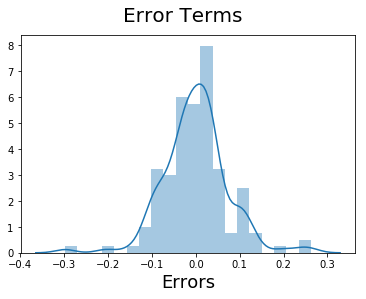

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Error term is normally distributed with centric at 0. But there are a few exceptions. Lets test it to see how the model works

In [64]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('price')
X_test = df_test

In [66]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
# Making predictions
y_pred = lm14.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'y_pred')

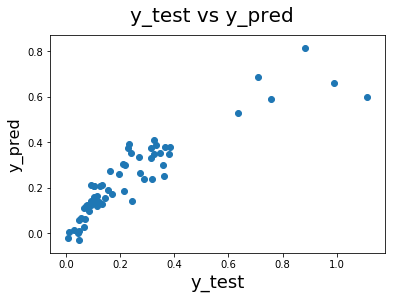

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Calculating R2-Score

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8048851483181669